# Project name: Stress level in students

Develop an artifact to predict stress levels on higher education students using Machine Learning.

This project aims to be used to help and improve educational institutions. With the results and 
findings of this research, colleges and universities can be favored and guided into developing changes 
in the design of the academic curriculum, planning of assignment submissions deadlines, final exam dates 
organization, and many other factors that can affect mental health in students.

### Features description


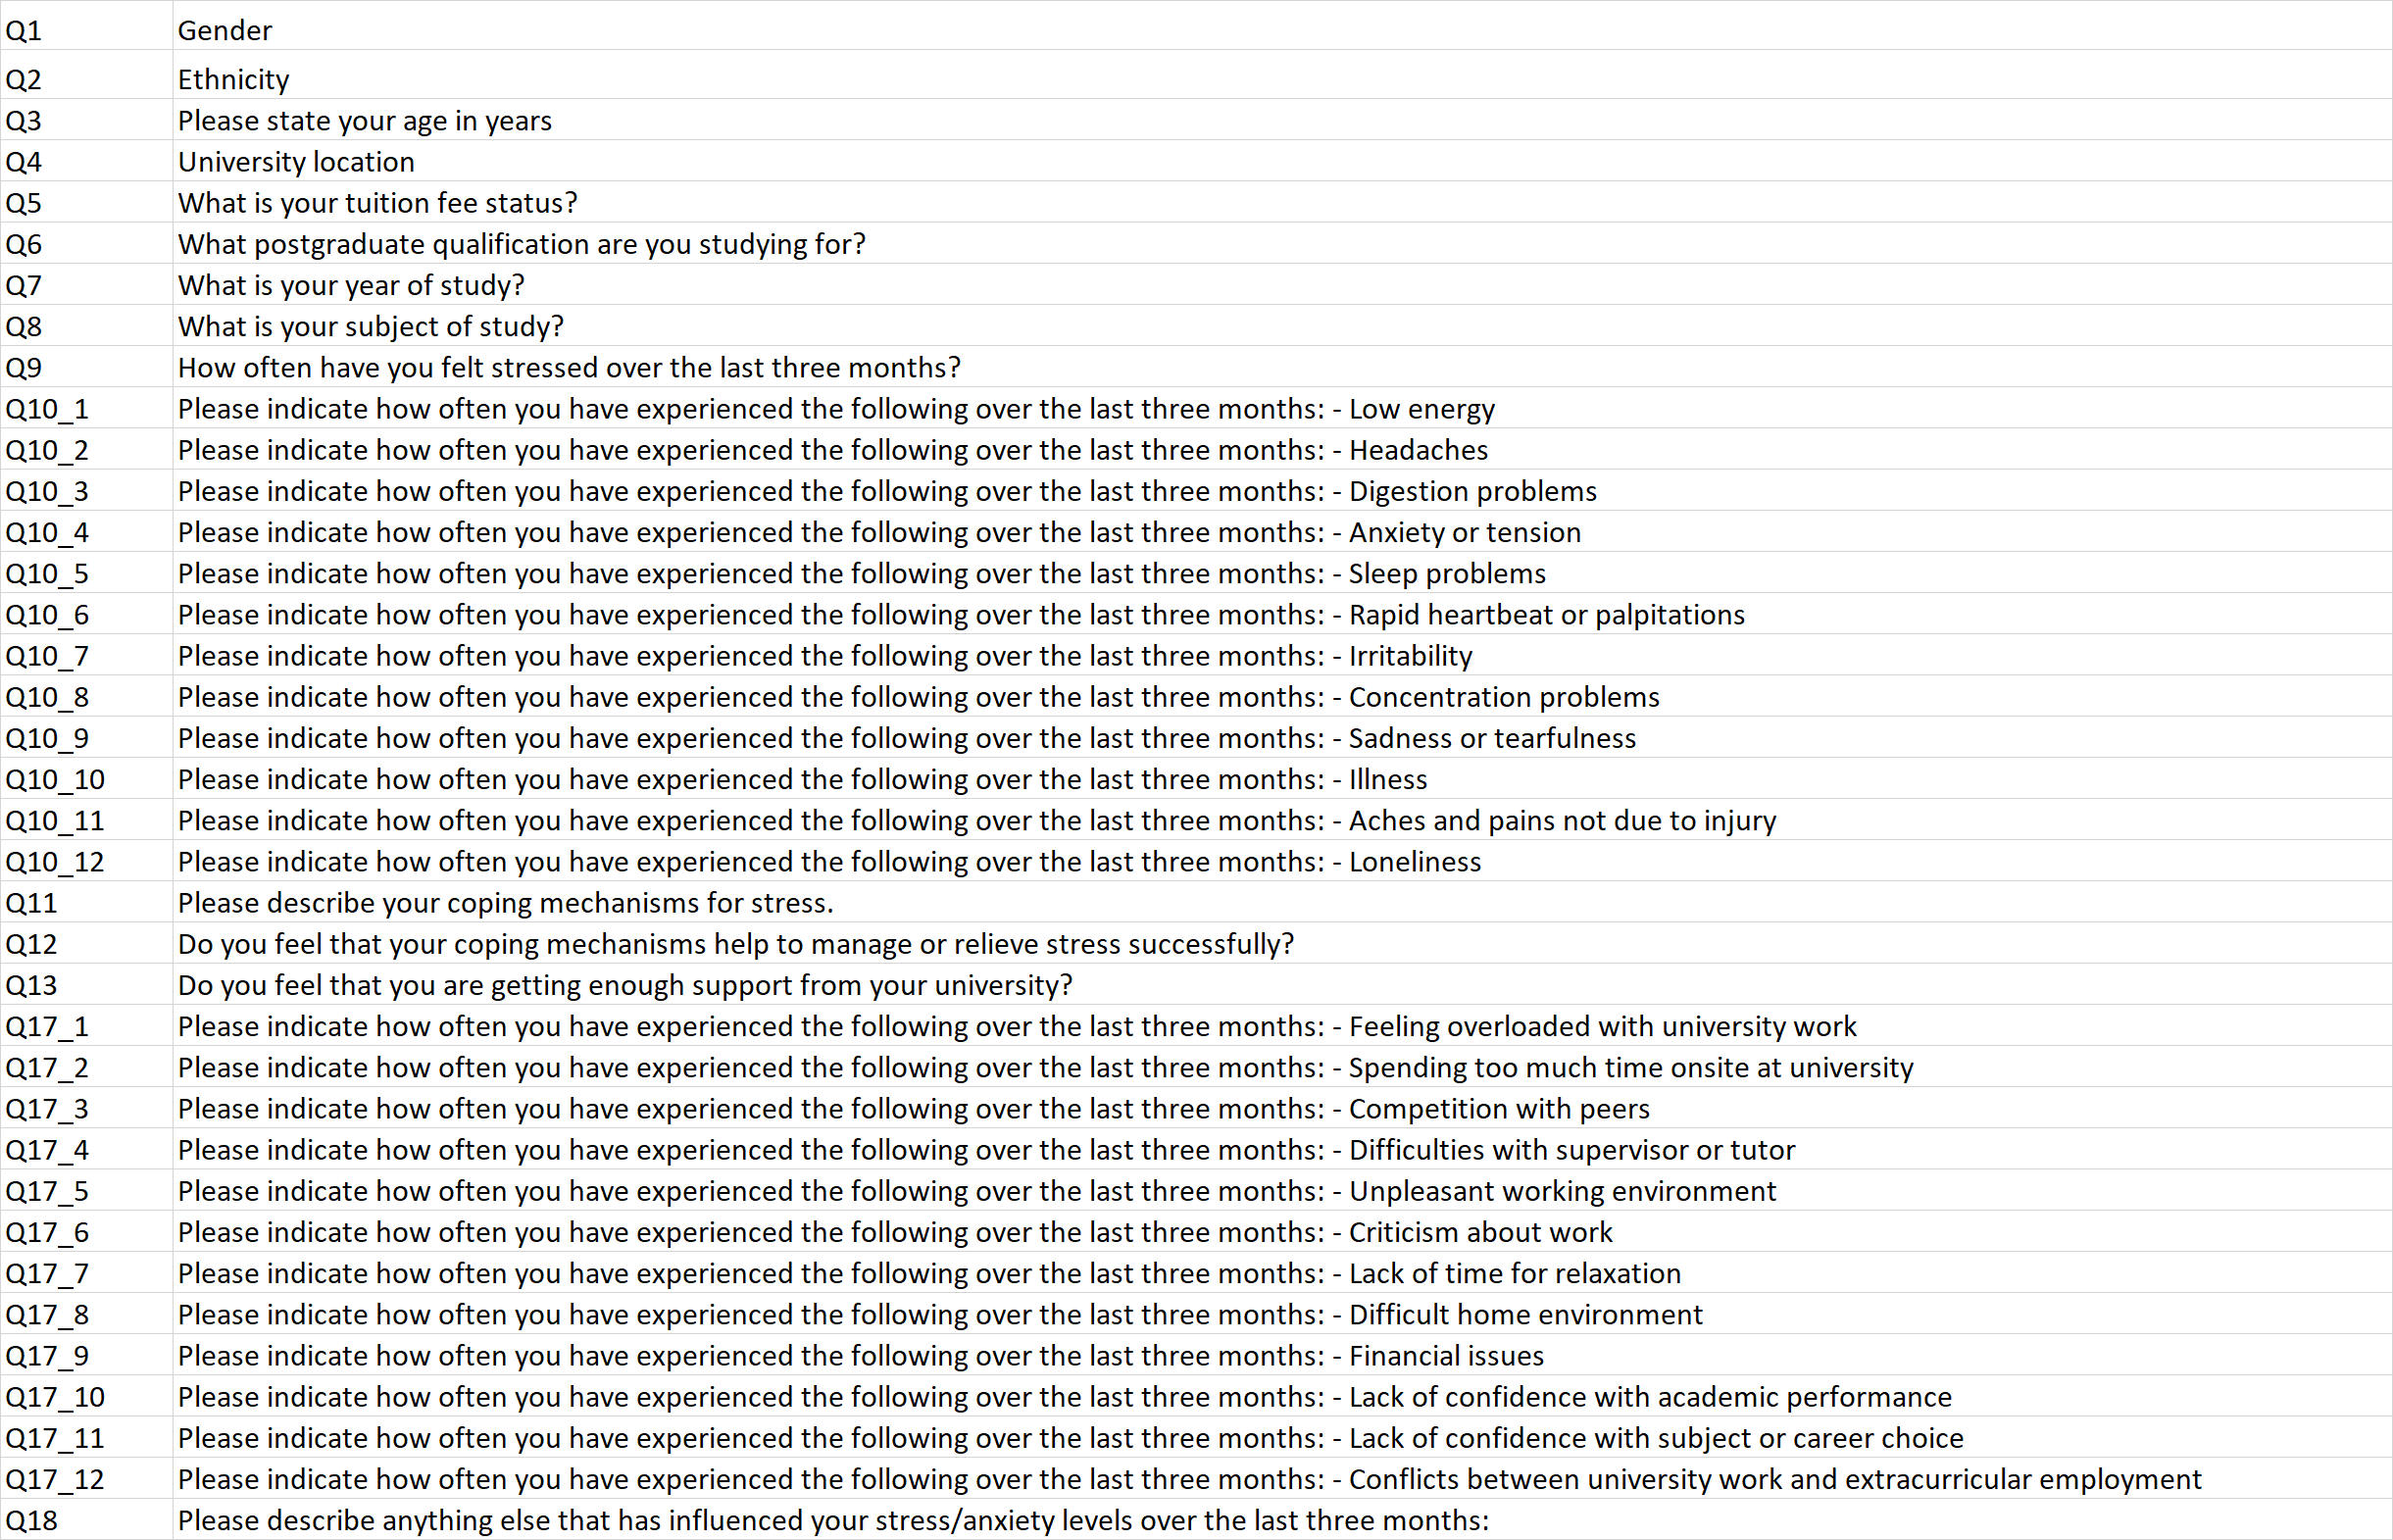

In [447]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

Load dataset from URL

In [448]:
dataset = pd.read_csv('https://raw.githubusercontent.com/Dani-elaqh/PiRates.Stress/main/dataset.csv')

## EDA (Exploratory Data Analysis)

Start explore the data

First step check how many observations and features has the data

In [449]:
print(dataset.shape)

(218, 36)


Let's take a look at 10 samples observations

In [450]:
dataset.sample(10)

Q1                                           Q2  Q3             Q5  \
112  Female                                        White  23             UK   
145  Female                                        White  28             UK   
93   Female  Black / African / Caribbean / Black British  27             UK   
194    Male                                        White  24             UK   
79   Female                                        White  24  International   
147  Female                                        White  30             UK   
55   Female                                        White  24             UK   
122  Female                                        White  25             EU   
58   Female               Mixed / Multiple Ethnic Groups  23             UK   
21   Female                                        White  27             UK   

                         Q6 Q7                                 Q8  \
112  Taught master's degree  1                         Psychology   
145                     PhD  4                         Psychology   
93                      PhD  3                         Psychology   
194                     PhD  2                      Life sciences   
79                      PhD  3                         Psychology   
147                     PhD  4                      Life sciences   
55   Taught master's degree  4                              Other   
122                     PhD  1  Clinical, pre-clinical and health   
58   Taught master's degree  1                Arts and humanities   
21                      PhD  3                   Physical science   

                    Q9         Q10_1         Q10_2  ...         Q17_4  \
112  To a small extent  Almost never  Fairly often  ...         Never   
145           Somewhat  Fairly often     Sometimes  ...  Fairly often   
93   To a large extent  Fairly often  Almost never  ...     Sometimes   
194  To a large extent  Fairly often     Sometimes  ...     Sometimes   
79          Completely  Fairly often     Sometimes  ...  Fairly often   
147  To a large extent     Sometimes  Almost never  ...  Almost never   
55          Completely  Fairly often    Very often  ...  Almost never   
122  To a large extent  Fairly often  Almost never  ...  Almost never   
58          Completely  Fairly often     Sometimes  ...     Sometimes   
21            Somewhat    Very often     Sometimes  ...     Sometimes   

            Q17_5         Q17_6         Q17_7         Q17_8         Q17_9  \
112  Almost never         Never         Never     Sometimes     Sometimes   
145  Almost never     Sometimes     Sometimes     Sometimes    Very often   
93      Sometimes    Very often     Sometimes         Never     Sometimes   
194     Sometimes     Sometimes  Fairly often  Almost never  Almost never   
79          Never    Very often    Very often  Almost never     Sometimes   
147     Sometimes  Almost never  Fairly often     Sometimes  Fairly often   
55   Almost never  Almost never    Very often     Sometimes     Sometimes   
122  Almost never  Almost never     Sometimes     Sometimes    Very often   
58      Sometimes     Sometimes  Fairly often  Almost never    Very often   
21   Almost never     Sometimes     Sometimes         Never     Sometimes   

           Q17_10        Q17_11        Q17_12  \
112     Sometimes         Never         Never   
145     Sometimes     Sometimes         Never   
93   Fairly often  Fairly often  Almost never   
194  Fairly often    Very often     Sometimes   
79     Very often  Fairly often     Sometimes   
147    Very often     Sometimes     Sometimes   
55      Sometimes     Sometimes  Almost never   
122  Almost never     Sometimes         Never   
58     Very often    Very often    Very often   
21   Fairly often  Fairly often  Almost never   

                                                   Q18  
112                                       Dissertation  
145                                                NaN  
93   Time manage

### Type of data (Numerical or Categorical?)

Identify which features are numerical and which are categorical

In [451]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**Note** that only one feature (Q3 = Age) has numerical values

### Missing Values

In [452]:
# NaN occurrences in Columns

print(dataset.isnull().sum(axis = 0))

Q1         0
Q2         0
Q3         0
Q5         0
Q6         0
Q7         0
Q8         0
Q9         0
Q10_1      0
Q10_2      0
Q10_3      0
Q10_4      0
Q10_5      0
Q10_6      0
Q10_7      0
Q10_8      0
Q10_9      0
Q10_10     0
Q10_11     0
Q10_12     0
Q11        0
Q12        0
Q13        0
Q17_1      0
Q17_2      0
Q17_3      0
Q17_4      0
Q17_5      0
Q17_6      0
Q17_7      0
Q17_8      0
Q17_9      0
Q17_10     0
Q17_11     0
Q17_12     0
Q18       74
dtype: int64


There are missing data only in one feature (Q18)

In [453]:
dataset_1 = dataset

In [454]:
dataset_1.sample(5)

Q1     Q2  Q3             Q5                        Q6 Q7  \
171    Male  Other  33  International                       PhD  4   
117  Female  White  25             UK                       PhD  1   
41   Female  White  26             UK  Research master's degree  1   
142  Female  White  26             UK                       PhD  2   
212    Male  White  56             UK                       PhD  2   

                                    Q8                 Q9         Q10_1  \
171                    Social sciences           Somewhat     Sometimes   
117                      Life sciences         Completely    Very often   
41   Clinical, pre-clinical and health           Somewhat     Sometimes   
142                         Psychology           Somewhat  Fairly often   
212                      Life sciences  To a small extent     Sometimes   

            Q10_2  ...         Q17_4         Q17_5         Q17_6  \
171  Almost never  ...     Sometimes     Sometimes  Fairly often   
117  Fairly often  ...         Never  Fairly often     Sometimes   
41      Sometimes  ...  Almost never  Almost never     Sometimes   
142         Never  ...  Almost never  Fairly often  Almost never   
212         Never  ...  Almost never  Almost never  Almost never   

            Q17_7         Q17_8         Q17_9        Q17_10        Q17_11  \
171  Fairly often     Sometimes  Almost never    Very often    Very often   
117    Very often         Never    Very often    Very often  Fairly often   
41   Fairly often         Never     Sometimes     Sometimes     Sometimes   
142     Sometimes         Never  Almost never  Fairly often  Almost never   
212  Fairly often  Almost never     Sometimes     Sometimes     Sometimes   

           Q17_12                                                Q18  
171  Almost never                              Family related issues  
117  Fairly often                                                NaN  
41      Sometimes                Sometimes stressful part-time job.   
142         Never                                         Body image  
212  Fairly often  Travel between university city and work city e...  

[5 rows x 36 columns]

In [455]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

### Statistics of the features

In [456]:
dataset_1.describe()

Q3
count   218.000000
mean     36.550459
std     132.862771
min      21.000000
25%      24.000000
50%      26.000000
75%      29.000000
max    1987.000000

Only shows the statistical data of the attribute Q3 that is the only numeric one so far.

### Outliers

show all outliers in the dataset

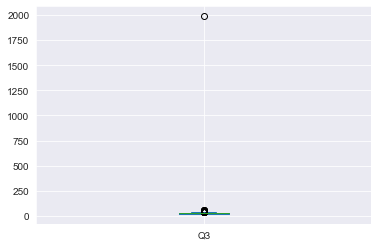

In [457]:
dataset_1.plot(kind='box', subplots=True, layout=(1,1), sharex=False, sharey=False)
plt.show()

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

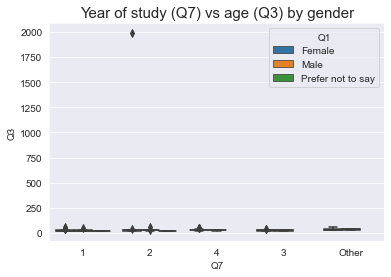

In [458]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

The data presents outliers in the Q3 feature corresponding to age.

### Fixing outliers

In [459]:
dataset_1['Q3'].value_counts()

26      32
24      29
25      27
22      24
29      20
23      15
27      12
28      11
31       7
30       7
36       4
32       3
33       3
21       3
39       3
35       3
34       3
48       2
43       2
58       1
53       1
63       1
1987     1
50       1
38       1
40       1
56       1
Name: Q3, dtype: int64

It was identified that the outlier is in relation to the fact that they put the year of birth and not the age, this data has to be replaced by the correct age

In [460]:
dataset_1['Q3'] = dataset_1['Q3'].replace(1987, 33)

In [461]:
##dataset_1['Q3'] = dataset_1['Q3'].replace(1987, dataset_1['Q3'].mode()[0])

Text(0.5, 1.0, 'Year of study (Q7) vs age (Q3) by gender')

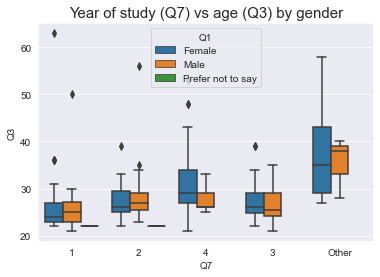

In [462]:
#BOX PLOT

sns.boxplot(x='Q7', y='Q3', data=dataset, hue='Q1')
plt.title('Year of study (Q7) vs age (Q3) by gender', fontsize=15)

### Converting the categorical feature into numerical

In [463]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Q1      218 non-null    object
 1   Q2      218 non-null    object
 2   Q3      218 non-null    int64 
 3   Q5      218 non-null    object
 4   Q6      218 non-null    object
 5   Q7      218 non-null    object
 6   Q8      218 non-null    object
 7   Q9      218 non-null    object
 8   Q10_1   218 non-null    object
 9   Q10_2   218 non-null    object
 10  Q10_3   218 non-null    object
 11  Q10_4   218 non-null    object
 12  Q10_5   218 non-null    object
 13  Q10_6   218 non-null    object
 14  Q10_7   218 non-null    object
 15  Q10_8   218 non-null    object
 16  Q10_9   218 non-null    object
 17  Q10_10  218 non-null    object
 18  Q10_11  218 non-null    object
 19  Q10_12  218 non-null    object
 20  Q11     218 non-null    object
 21  Q12     218 non-null    object
 22  Q13     218 non-null    ob

**35 out of 36 features are objects, all columns must be evaluated and replaced by numerical data.**

In [464]:
dataset_1['Q1'].value_counts()

Female               161
Male                  55
Prefer not to say      2
Name: Q1, dtype: int64

In [465]:
dataset_1['Q1'].unique()

array(['Female', 'Male', 'Prefer not to say'], dtype=object)

In [466]:
##dataset_1['Q1'].map({'Female':1, 'Male':2, 'Prefer not to say':3})

In [467]:
dataset_1['Q1'].replace(('Female', 'Male', 'Prefer not to say'),(1, 2, 3), inplace = True)

In [468]:
dataset_1.sample(5)

Q1                     Q2  Q3             Q5   Q6 Q7  \
97    1                  White  29             UK  PhD  4   
109   1                  Other  29  International  PhD  3   
144   1                  White  48             UK  PhD  4   
63    1  Asian / Asian British  31  International  PhD  2   
129   1                  White  24             UK  PhD  2   

                             Q8                 Q9         Q10_1  \
97          Arts and humanities           Somewhat  Fairly often   
109                   Education         Completely  Fairly often   
144         Arts and humanities  To a large extent  Fairly often   
63             Computer science  To a large extent     Sometimes   
129  Engineering and technology  To a large extent    Very often   

            Q10_2  ...         Q17_4         Q17_5         Q17_6  \
97      Sometimes  ...         Never     Sometimes  Fairly often   
109     Sometimes  ...     Sometimes     Sometimes  Almost never   
144  Almost never  ...  Almost never         Never         Never   
63      Sometimes  ...         Never  Almost never         Never   
129  Almost never  ...         Never         Never         Never   

            Q17_7         Q17_8       Q17_9        Q17_10        Q17_11  \
97      Sometimes     Sometimes   Sometimes    Very often     Sometimes   
109    Very often     Sometimes  Very often  Fairly often     Sometimes   
144    Very often  Almost never       Never  Fairly often  Almost never   
63     Very often  Almost never       Never         Never  Almost never   
129  Fairly often  Almost never   Sometimes  Fairly often  Almost never   

           Q17_12                                                Q18  
97     Very often                               Long weekly commute   
109  Almost never                                                NaN  
144    Very often  As a mature student I have a young child, a pa...  
63          Never                 Being away from family and friends  
129         Never  High stress of my other half from their univer...  

[5 rows x 36 columns]

In [469]:
dataset_1['Q2'].value_counts()

White                                          174
Mixed / Multiple Ethnic Groups                  15
Asian / Asian British                           14
Other                                           11
Black / African / Caribbean / Black British      4
Name: Q2, dtype: int64

In [470]:
dataset_1['Q2'].unique()

array(['White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British',
       'Other', 'Black / African / Caribbean / Black British'],
      dtype=object)

In [471]:
dataset_1['Q2'].replace(('White', 'Mixed / Multiple Ethnic Groups', 'Asian / Asian British','Other', 
                         'Black / African / Caribbean / Black British'),(1, 2, 3, 4, 5), inplace = True)

In [472]:
dataset_1['Q3'].value_counts()

26    32
24    29
25    27
22    24
29    20
23    15
27    12
28    11
31     7
30     7
36     4
33     4
32     3
21     3
39     3
35     3
34     3
48     2
43     2
58     1
53     1
63     1
50     1
38     1
40     1
56     1
Name: Q3, dtype: int64

### Group ages into ranges

The feature Q3 (Age) will have to be classified by ranges so as not to have many values that can cause noise in the data analysis.

In [473]:
bins = [0, 25, 30, 35, 40, 45, 50, 55, 60, 65]

In [474]:
names = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [475]:
dataset_1['Q3'] = pd.cut(dataset_1['Q3'], bins, labels = names)

In [476]:
dataset_1['Q3'].replace(('1', '2', '3', '4', '5', '6', '7', '8', '9'),(1, 2, 3, 4, 5, 6, 7, 8, 9), inplace = True)

In [477]:
dataset_1['Q3'].value_counts()

1    98
2    82
3    20
4     9
6     3
5     2
8     2
7     1
9     1
Name: Q3, dtype: int64

In [478]:
dataset_1['Q5'].replace(('EU', 'International', 'UK'),(1, 2, 1), inplace = True)

In [479]:
dataset_1['Q5'].value_counts()

1    185
2     33
Name: Q5, dtype: int64

In [480]:
dataset_1['Q6'].replace(("Other", "PhD", "Research master's degree","Taught master's degree"),(0, 1, 2, 3), inplace = True)

In [481]:
dataset_1['Q6'].value_counts()

1    160
3     41
2     12
0      5
Name: Q6, dtype: int64

In [482]:
dataset_1['Q7'].replace(('1','2', '3','4','Other'),(1, 2, 3, 4, 1), inplace = True)

In [483]:
dataset_1['Q7'].value_counts()

1    108
2     44
3     38
4     28
Name: Q7, dtype: int64

In [484]:
dataset_1['Q8'].unique()

array(['Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'], dtype=object)

In [485]:
dataset_1['Q8'].replace(('Arts and humanities', 'Computer science', 'Life sciences',
       'Physical science', 'Social sciences',
       'Engineering and technology', 'Clinical, pre-clinical and health',
       'Education', 'Other', 'Law', 'Psychology'),(1, 3, 6, 8, 7, 3, 2, 4, 10, 5, 9), inplace = True)

In [486]:
dataset_1['Q8'].value_counts()

6     80
1     42
9     17
7     15
10    15
3     13
2     13
8     11
5      7
4      5
Name: Q8, dtype: int64

In [487]:
dataset_1['Q9'].unique()

array(['To a large extent', 'Somewhat', 'Completely', 'To a small extent'],
      dtype=object)

In [488]:
dataset_1['Q9'].replace(('To a large extent', 'Somewhat', 'Completely', 'To a small extent', 'not at all'),
                        (4, 3, 5, 2, 1), inplace = True)

In [489]:
dataset_1['Q9'].value_counts()

4    120
3     55
5     36
2      7
Name: Q9, dtype: int64

In [490]:
dataset_1.sample(3)

Q1  Q2 Q3  Q5  Q6  Q7  Q8  Q9         Q10_1         Q10_2  ...  \
62    1   3  2   1   1   4   6   4    Very often  Fairly often  ...   
173   2   1  1   1   1   2   6   3  Fairly often  Almost never  ...   
129   1   1  1   1   1   2   3   4    Very often  Almost never  ...   

            Q17_4         Q17_5       Q17_6         Q17_7         Q17_8  \
62   Fairly often  Fairly often  Very often  Fairly often     Sometimes   
173  Fairly often  Almost never       Never     Sometimes         Never   
129         Never         Never       Never  Fairly often  Almost never   

            Q17_9        Q17_10        Q17_11        Q17_12  \
62      Sometimes    Very often    Very often  Almost never   
173  Almost never    Very often  Almost never         Never   
129     Sometimes  Fairly often  Almost never         Never   

                                                   Q18  
62   Illness of family member, another family membe...  
173                                             Moving  
129  High stress of my other half from their univer...  

[3 rows x 36 columns]

In [491]:
dataset_1['Q10_1'].unique()

array(['Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'],
      dtype=object)

In [492]:
dataset_1['Q10_1'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [493]:
dataset_1['Q10_2'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [494]:
dataset_1['Q10_3'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                           inplace = True)

In [495]:
dataset_1['Q10_4'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),(3, 4, 1, 5, 2), 
                          inplace = True)

In [496]:
dataset_1['Q10_5'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [497]:
dataset_1['Q10_6'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [498]:
dataset_1['Q10_7'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [499]:
dataset_1['Q10_8'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [500]:
dataset_1['Q10_9'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [501]:
dataset_1['Q10_10'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [502]:
dataset_1['Q10_11'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [503]:
dataset_1['Q10_12'].replace(('Sometimes', 'Fairly often', 'Never', 'Very often', 'Almost never'),
                        (3, 4, 1, 5, 2), inplace = True)

In [504]:
dataset_1['Q10_12'].value_counts()

3    72
2    53
4    38
1    36
5    19
Name: Q10_12, dtype: int64

In [505]:
dataset_1['Q12'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [506]:
dataset_1['Q12'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [507]:
dataset_1['Q12'].value_counts()

1    91
3    91
2    36
Name: Q12, dtype: int64

In [508]:
dataset_1['Q13'].unique()

array(['Yes', 'Not sure', 'No'], dtype=object)

In [509]:
dataset_1['Q13'].replace(('Yes', 'Not sure', 'No'),(1, 3, 2), inplace = True)

In [510]:
dataset_1['Q17_1'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_2'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_3'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_4'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_5'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_6'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_7'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_8'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_9'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_10'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_11'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)
dataset_1['Q17_12'].replace(('Never', 'Almost never', 'Sometimes', 'Fairly often', 'Very often'),(1, 2, 3, 4, 5), inplace = True)

**Drop column Q11, Q18** because the information is irrelevant for the data analysis

In [552]:
dataset_1.drop(columns =['Q11'], inplace = True)

In [511]:
dataset_1.drop(columns =['Q18'], inplace = True)

### Verify all changes made to the dataset

**All features are numerical data**

In [553]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218 entries, 0 to 217
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   Q1      218 non-null    int64   
 1   Q2      218 non-null    int64   
 2   Q3      218 non-null    category
 3   Q5      218 non-null    int64   
 4   Q6      218 non-null    int64   
 5   Q7      218 non-null    int64   
 6   Q8      218 non-null    int64   
 7   Q9      218 non-null    int64   
 8   Q10_1   218 non-null    int64   
 9   Q10_2   218 non-null    int64   
 10  Q10_3   218 non-null    int64   
 11  Q10_4   218 non-null    int64   
 12  Q10_5   218 non-null    int64   
 13  Q10_6   218 non-null    int64   
 14  Q10_7   218 non-null    int64   
 15  Q10_8   218 non-null    int64   
 16  Q10_9   218 non-null    int64   
 17  Q10_10  218 non-null    int64   
 18  Q10_11  218 non-null    int64   
 19  Q10_12  218 non-null    int64   
 20  Q12     218 non-null    int64   
 21  Q13     218 non-

In [554]:
dataset_1.sample(5)

Q1  Q2 Q3  Q5  Q6  Q7  Q8  Q9  Q10_1  Q10_2  ...  Q17_3  Q17_4  Q17_5  \
40    1   3  1   1   1   2   6   4      5      4  ...      3      2      2   
92    1   1  1   1   1   1   6   4      4      2  ...      4      4      4   
53    1   1  1   1   1   1   8   5      4      1  ...      4      5      3   
195   2   1  1   1   1   2   6   4      4      4  ...      2      2      2   
122   1   1  1   1   1   1   2   4      4      2  ...      2      2      2   

     Q17_6  Q17_7  Q17_8  Q17_9  Q17_10  Q17_11  Q17_12  
40       3      4      3      3       4       3       2  
92       2      3      3      2       5       4       2  
53       5      5      1      1       5       4       1  
195      2      4      3      5       5       5       1  
122      2      3      3      5       2       3       1  

[5 rows x 34 columns]

**Statistics of the feature**

In [555]:
dataset_1.describe()

Q1          Q2          Q5          Q6          Q7          Q8  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     1.270642    1.422018    1.151376    1.408257    1.935780    5.220183   
std      0.465551    0.948378    0.359240    0.816492    1.088484    2.816534   
min      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.250000   
50%      1.000000    1.000000    1.000000    1.000000    2.000000    6.000000   
75%      2.000000    1.000000    1.000000    1.000000    3.000000    7.000000   
max      3.000000    5.000000    2.000000    3.000000    4.000000   10.000000   

               Q9       Q10_1       Q10_2       Q10_3  ...       Q17_3  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000   
mean     3.848624    3.844037    2.995413    3.036697  ...    2.784404   
std      0.724822    0.781990    1.013720    1.098190  ...    1.200743   
min      2.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      3.000000    3.000000    2.000000    2.000000  ...    2.000000   
50%      4.000000    4.000000    3.000000    3.000000  ...    3.000000   
75%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

            Q17_4       Q17_5       Q17_6       Q17_7       Q17_8       Q17_9  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     2.344037    2.366972    2.399083    3.527523    2.288991    2.940367   
std      1.146417    1.074725    1.021158    1.034731    1.204434    1.284837   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    2.000000    2.000000    3.000000    1.000000    2.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    3.000000   
75%      3.000000    3.000000    3.000000    4.000000    3.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

           Q17_10      Q17_11      Q17_12  
count  218.000000  218.000000  218.000000  
mean     3.880734    3.321101    2.366972  
std      1.035986    1.239747    1.424994  
min      1.000000    1.000000    1.000000  
25%      3.000000    2.000000    1.000000  
50%      4.000000    3.000000    2.000000  
75%      5.000000    4.000000    3.750000  
max      5.000000    5.000000    5.000000  

[8 rows x 33 columns]

**No missing values**

In [556]:
#'NaN occurrences in Columns

print(dataset_1.isnull().sum(axis = 0))

Q1        0
Q2        0
Q3        0
Q5        0
Q6        0
Q7        0
Q8        0
Q9        0
Q10_1     0
Q10_2     0
Q10_3     0
Q10_4     0
Q10_5     0
Q10_6     0
Q10_7     0
Q10_8     0
Q10_9     0
Q10_10    0
Q10_11    0
Q10_12    0
Q12       0
Q13       0
Q17_1     0
Q17_2     0
Q17_3     0
Q17_4     0
Q17_5     0
Q17_6     0
Q17_7     0
Q17_8     0
Q17_9     0
Q17_10    0
Q17_11    0
Q17_12    0
dtype: int64


C:\Users\Jose\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Q3', ylabel='Q7'>

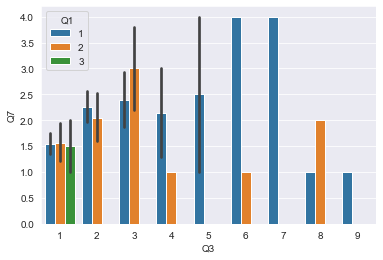

In [557]:
sns.barplot('Q3','Q7', hue = 'Q1', data=dataset_1)

Text(0.5, 1.0, "Stress level (Q9) vs Age's Range")

<Figure size 576x288 with 0 Axes>

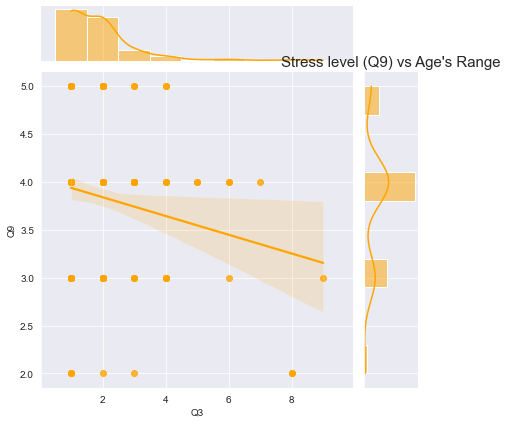

In [558]:
#Scatter plot

sns.set_style('darkgrid')
plt.figure(figsize=(8,4))
sns.jointplot(x='Q3', y='Q9', data=dataset_1, kind='reg', color='orange')
plt.title("Stress level (Q9) vs Age's Range", fontsize=15)

### Correlations

In [559]:
corr1= dataset_1.corr()
corr1

Q1        Q2        Q5        Q6        Q7        Q8        Q9  \
Q1      1.000000 -0.009384 -0.025658 -0.025303 -0.047388 -0.098372 -0.164819   
Q2     -0.009384  1.000000  0.555565 -0.074745  0.071017  0.108246  0.086659   
Q5     -0.025658  0.555565  1.000000 -0.133111  0.083901  0.007897 -0.000081   
Q6     -0.025303 -0.074745 -0.133111  1.000000 -0.369625  0.092988  0.003679   
Q7     -0.047388  0.071017  0.083901 -0.369625  1.000000 -0.138166  0.034349   
Q8     -0.098372  0.108246  0.007897  0.092988 -0.138166  1.000000  0.054776   
Q9     -0.164819  0.086659 -0.000081  0.003679  0.034349  0.054776  1.000000   
Q10_1  -0.149343 -0.022689 -0.128825 -0.022513  0.047732  0.118186  0.470365   
Q10_2  -0.095003  0.059543 -0.023393  0.013408  0.037319 -0.072275  0.275009   
Q10_3  -0.109651  0.117802 -0.002465  0.106560 -0.040426  0.030153  0.215428   
Q10_4  -0.177369  0.101385  0.008640  0.076582 -0.025512  0.058955  0.629963   
Q10_5  -0.026129 -0.013076 -0.072560  0.040438 -0.001705  0.105758  0.350746   
Q10_6  -0.120522  0.022271 -0.012095  0.059655 -0.003858  0.121654  0.424913   
Q10_7  -0.113767 -0.081104 -0.145389  0.118352 -0.022284  0.053191  0.358145   
Q10_8  -0.064634  0.017392 -0.110786  0.087750  0.051284  0.150572  0.308163   
Q10_9  -0.239117  0.103638 -0.088255  0.068145 -0.037839  0.067688  0.577683   
Q10_10 -0.150092  0.118457  0.037879  0.122583 -0.018652 -0.061340  0.235658   
Q10_11 -0.140798  0.102447  0.039171  0.176729  0.100953 -0.021518  0.316664   
Q10_12 -0.132500  0.163983  0.091836  0.072026  0.021076  0.101291  0.360038   
Q12     0.010809  0.053058  0.028014 -0.024651  0.027737  0.023225  0.256865   
Q13    -0.030983  0.147238  0.105206  0.022060  0.077372 -0.052125  0.042644   
Q17_1  -0.153771  0.095223  0.000774  0.039157  0.141200  0.001448  0.403760   
Q17_2   0.021665  0.148238  0.096663 -0.104049  0.077898  0.105262  0.194337   
Q17_3  -0.051769 -0.061370 -0.116291  0.029087 -0.014168 -0.022690  0.295908   
Q17_4  -0.002574  0.145588  0.040806  0.080645 -0.011757  0.113442  0.135059   
Q17_5  -0.024420  0.127674 -0.049058  0.080557  0.012360  0.000587  0.207703   
Q17_6  -0.024678  0.177416  0.048116 -0.002865  0.068770 -0.061136  0.218970   
Q17_7  -0.058583  0.067942 -0.017459 -0.010634  0.132507 -0.036876  0.395752   
Q17_8  -0.033288  0.037975  0.015585  0.104404  0.014222 -0.014768  0.261489   
Q17_9  -0.057640  0.028312 -0.030273  0.155098 -0.035702 -0.094410  0.079333   
Q17_10 -0.162080  0.070226 -0.000795 -0.072923  0.025869 -0.016228  0.368613   
Q17_11 -0.071420  0.091945 -0.037212  0.074762  0.035841 -0.020341  0.238961   
Q17_12 -0.060096  0.055372 -0.027997  0.235027  0.059829 -0.230343  0.174496   

           Q10_1     Q10_2     Q10_3  ...     Q17_3     Q17_4     Q17_5  \
Q1     -0.149343 -0.095003 -0.109651  ... -0.051769 -0.002574 -0.024420   
Q2     -0.022689  0.059543  0.117802  ... -0.061370  0.145588  0.127674   
Q5     -0.128825 -0.023393 -0.002465  ... -0.116291  0.040806 -0.049058   
Q6     -0.022513  0.013408  0.106560  ...  0.029087  0.080645  0.080557   
Q7      0.047732  0.037319 -0.040426  ... -0.014168 -0.011757  0.012360   
Q8      0.118186 -0.072275  0.030153  ... -0.022690  0.113442  0.000587   
Q9      0.470365  0.275009  0.215428  ...  0.295908  0.135059  0.207703   
Q10_1   1.000000  0.260691  0.226707  ...  0.356650  0.214340  0.271298   
Q10_2   0.260691  1.000000  0.260939  ...  0.097618  0.116359  0.149597   
Q10_3   0.226707  0.260939  1.000000  ...  0.156301  0.121698  0.136908   
Q10_4   0.391232  0.146903  0.227451  ...  0.357147  0.093399  0.079677   
Q10_5   0.337125  0.183386  0.166727  ...  0.364345  0.211182  0.209578   
Q10_6   0.262655  0.287740  0.194374  ...  0.317162  0.181138  0.265701   
Q10_7   0.357727  0.219781  0.222286  ...  0.286264  0.133018  0.153398   
Q10_8   0.380487  0.163710  0.044697  ...  0.237007  0.261891  0.265834   
Q10_9   0.437698  0.247979  0.221031  ...  0.284079  0.080124  0.114891   
Q10_10  0.253634  

<AxesSubplot:>

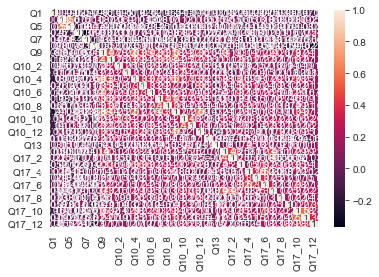

In [560]:
sns.heatmap(corr1, annot=True)

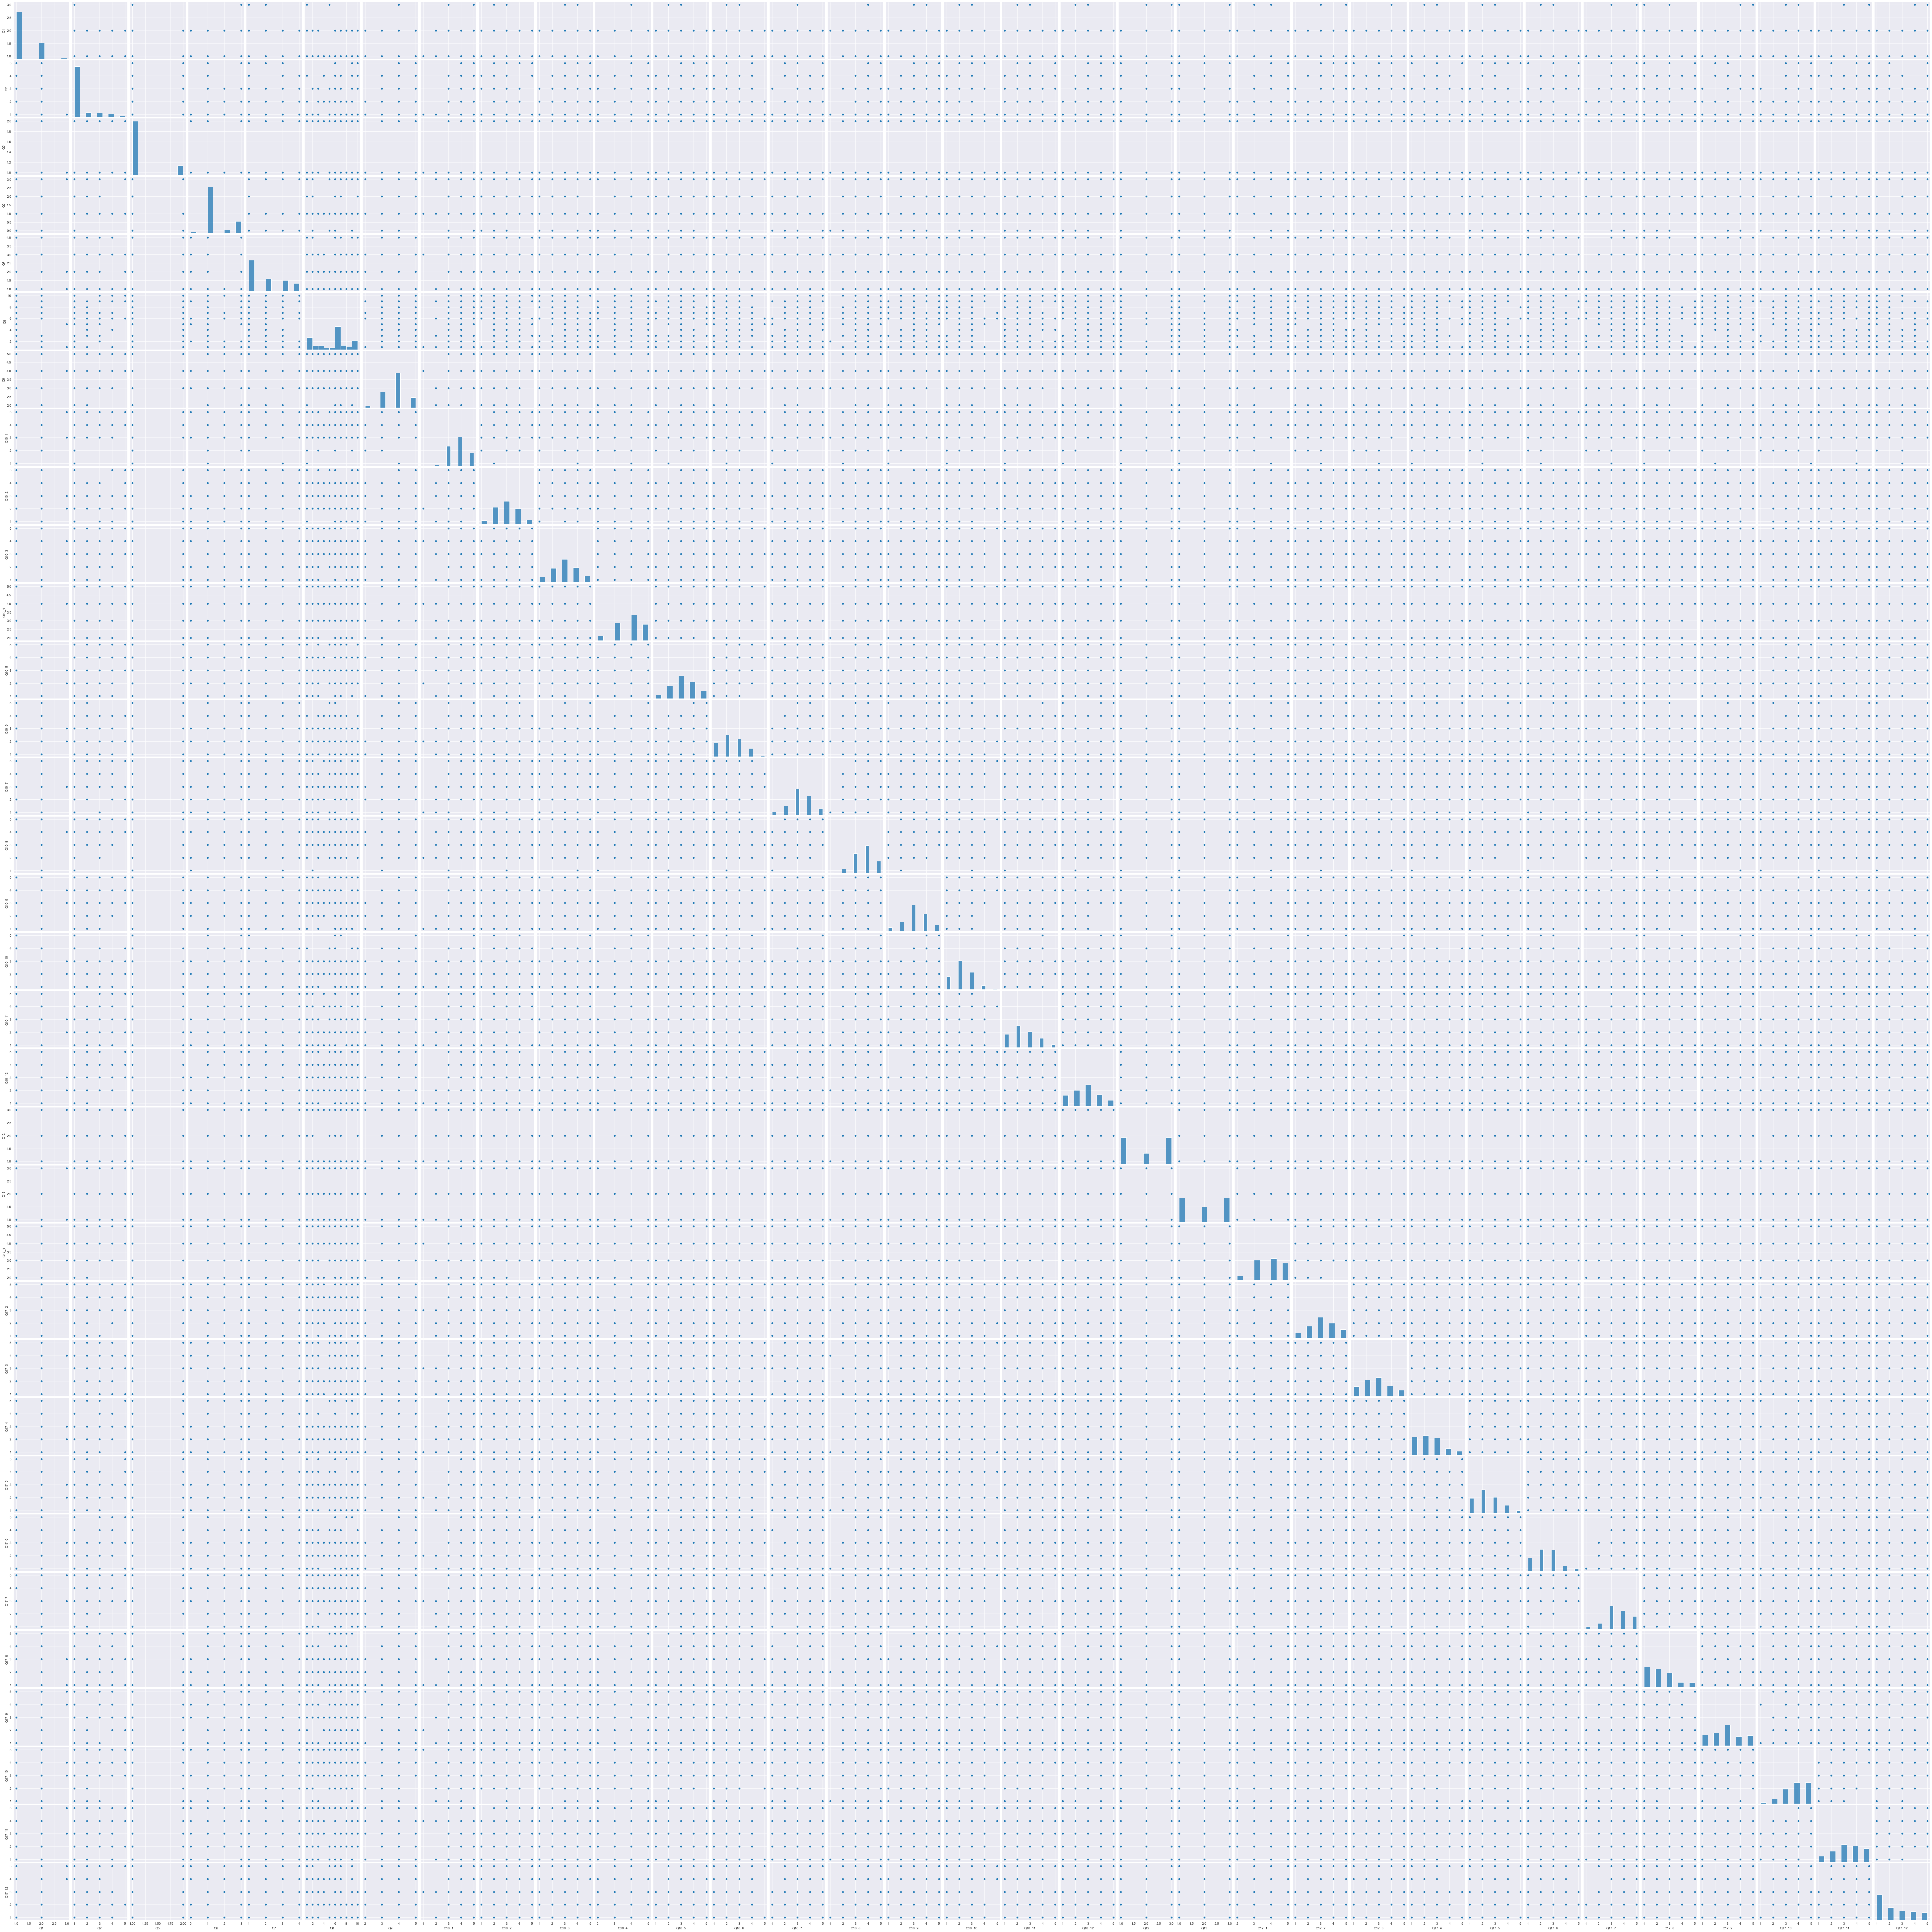

In [92]:
sns.pairplot(dataset_1)

In [561]:
dataset_1.sample(5)

Q1  Q2 Q3  Q5  Q6  Q7  Q8  Q9  Q10_1  Q10_2  ...  Q17_3  Q17_4  Q17_5  \
195   2   1  1   1   1   2   6   4      4      4  ...      2      2      2   
199   2   1  1   1   1   1   6   5      5      2  ...      3      3      4   
108   1   1  4   1   3   1   5   5      5      4  ...      4      3      4   
59    1   1  1   1   1   1   1   3      3      3  ...      3      1      2   
121   1   2  2   1   1   1   5   4      3      3  ...      3      2      3   

     Q17_6  Q17_7  Q17_8  Q17_9  Q17_10  Q17_11  Q17_12  
195      2      4      3      5       5       5       1  
199      2      4      5      2       3       3       1  
108      4      5      3      5       4       5       5  
59       1      1      1      2       3       1       1  
121      2      2      2      2       2       1       1  

[5 rows x 34 columns]

## Reindex columns 

Reindex column Q9 (dependent feature) to the end that represents How is the stressed level over the last Semester.

In [562]:
dataset_1.columns

Index(['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3', 'Q17_4',
       'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q17_11',
       'Q17_12'],
      dtype='object')

In [563]:
dataset_1.reindex(columns=['Q1', 'Q2', 'Q3', 'Q5', 'Q6', 'Q7', 'Q8', 'Q10_1', 'Q10_2',
       'Q10_3', 'Q10_4', 'Q10_5', 'Q10_6', 'Q10_7', 'Q10_8', 'Q10_9', 'Q10_10',
       'Q10_11', 'Q10_12', 'Q12', 'Q13', 'Q17_1', 'Q17_2', 'Q17_3',
       'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10',
       'Q17_11', 'Q17_12', 'Q9'])

Q1  Q2 Q3  Q5  Q6  Q7  Q8  Q10_1  Q10_2  Q10_3  ...  Q17_4  Q17_5  Q17_6  \
0     1   1  2   2   1   1   1      3      2      1  ...      1      1      1   
1     1   1  2   1   1   2   3      4      3      5  ...      1      3      3   
2     1   1  7   1   1   4   1      4      2      3  ...      2      3      2   
3     1   2  2   1   1   4   1      3      3      2  ...      2      1      2   
4     1   1  1   1   2   1   6      3      2      3  ...      2      2      3   
..   ..  .. ..  ..  ..  ..  ..    ...    ...    ...  ...    ...    ...    ...   
213   2   2  1   1   2   1   6      4      2      3  ...      2      3      2   
214   2   1  1   1   1   3   7      3      2      3  ...      3      2      2   
215   2   1  2   2   1   1   6      3      3      2  ...      1      1      2   
216   3   1  1   1   3   2   5      5      2      3  ...      2      2      3   
217   3   1  1   1   3   1   1      3      3      4  ...      3      3      2   

     Q17_7  Q17_8  Q17_9  Q17_10  Q17_11  Q17_12  Q9  
0        3      1      1       5       2       1   4  
1        3      1      3       3       3       1   3  
2        5      1      5       2       3       4   4  
3        3      3      2       3       3       2   3  
4        3      1      1       3       4       3   3  
..     ...    ...    ...     ...     ...     ...  ..  
213      4      5      5       4       4       4   5  
214      2      2      3       2       3       1   2  
215      5      3      4       4       5       1   3  
216      3      1      4       4       5       4   4  
217      5      3      5       3       3       5   4  

[218 rows x 34 columns]

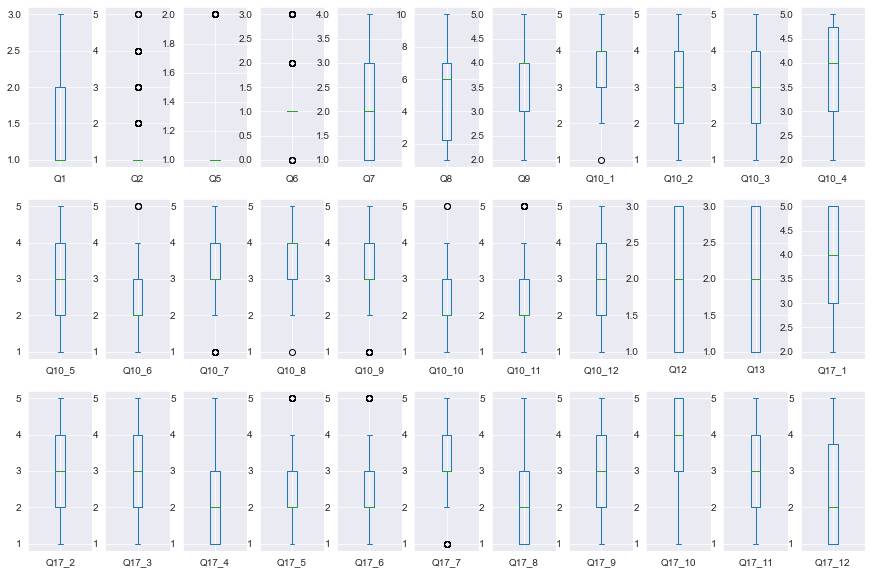

In [564]:
dataset_1.plot(kind='box', subplots=True, layout=(3,11), sharex=False, sharey=False, figsize=(15, 10))
plt.show()

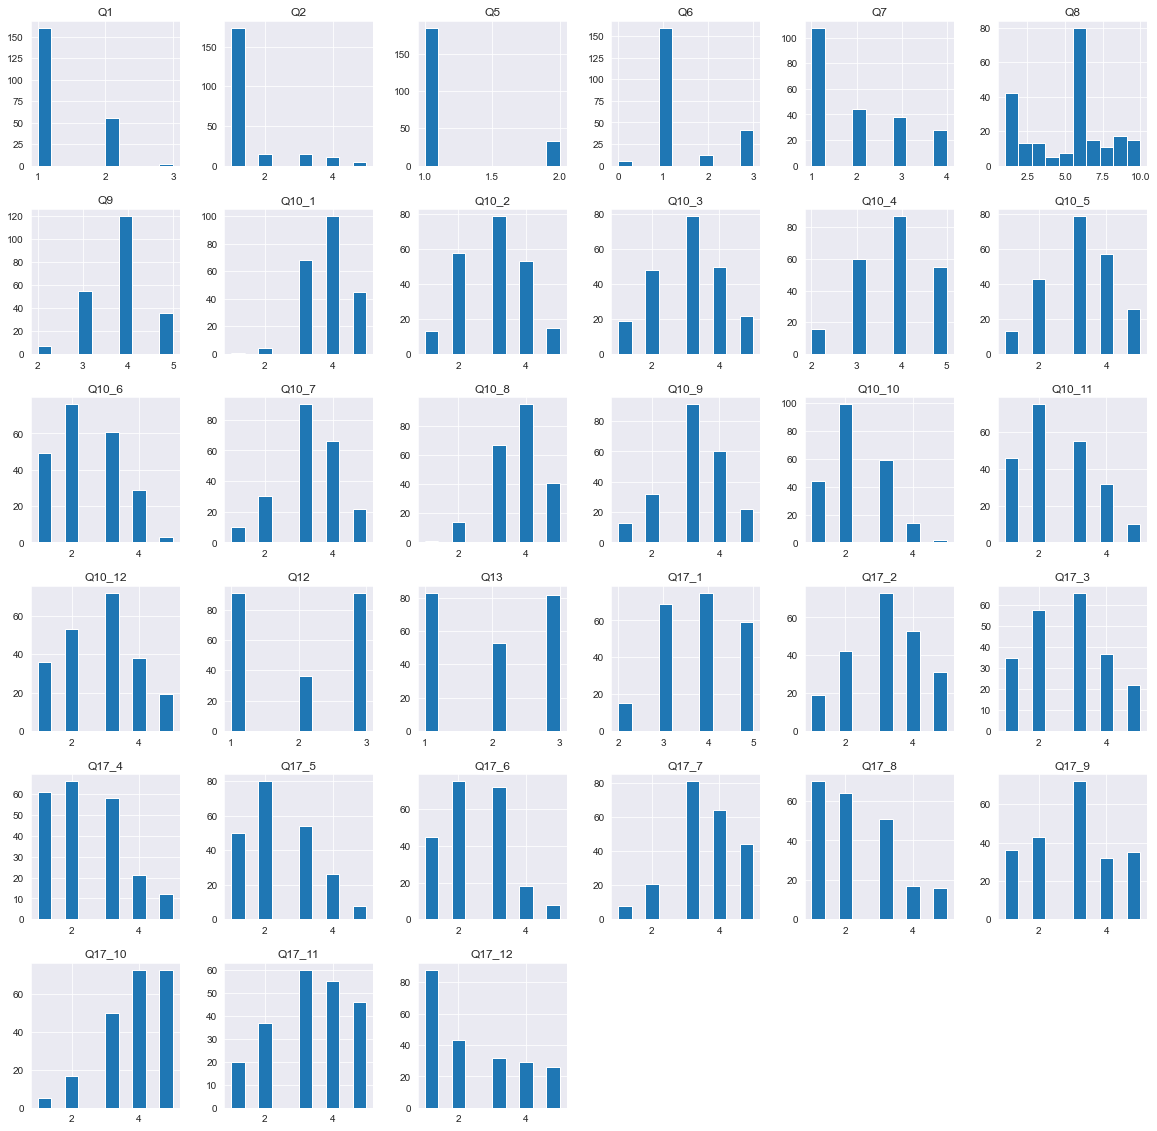

In [565]:
dataset_1.hist(figsize=(20, 20))
plt.show()

### Create a Validation Dataset

In [570]:
array = dataset_1.values
X = array[:,0:33]
y = array[:,33]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

### Build Models

Test for 6 different algorithms:
    
1. Logistic Regression (LR)
2. Linear Discriminant Analysis (LDA)
3. K-Nearest Neighbors (KNN).
4. Classification and Regression Trees (CART).
5. Gaussian Naive Bayes (NB).
6. Support Vector Machines (SVM).

In [571]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

Evaluate each model in turn

In [572]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.379085 (0.084096)
LDA: 0.431046 (0.093666)
KNN: 0.367974 (0.136547)
CART: 0.331699 (0.168218)
NB: 0.385294 (0.108450)
SVM: 0.426797 (0.097023)


In [574]:
dataset_2 = dataset_1

In [578]:
dataset_2.describe()

Q1          Q2          Q5          Q6          Q7          Q8  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     1.270642    1.422018    1.151376    1.408257    1.935780    5.220183   
std      0.465551    0.948378    0.359240    0.816492    1.088484    2.816534   
min      1.000000    1.000000    1.000000    0.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    1.000000    2.250000   
50%      1.000000    1.000000    1.000000    1.000000    2.000000    6.000000   
75%      2.000000    1.000000    1.000000    1.000000    3.000000    7.000000   
max      3.000000    5.000000    2.000000    3.000000    4.000000   10.000000   

               Q9       Q10_1       Q10_2       Q10_3  ...       Q17_3  \
count  218.000000  218.000000  218.000000  218.000000  ...  218.000000   
mean     3.848624    3.844037    2.995413    3.036697  ...    2.784404   
std      0.724822    0.781990    1.013720    1.098190  ...    1.200743   
min      2.000000    1.000000    1.000000    1.000000  ...    1.000000   
25%      3.000000    3.000000    2.000000    2.000000  ...    2.000000   
50%      4.000000    4.000000    3.000000    3.000000  ...    3.000000   
75%      4.000000    4.000000    4.000000    4.000000  ...    4.000000   
max      5.000000    5.000000    5.000000    5.000000  ...    5.000000   

            Q17_4       Q17_5       Q17_6       Q17_7       Q17_8       Q17_9  \
count  218.000000  218.000000  218.000000  218.000000  218.000000  218.000000   
mean     2.344037    2.366972    2.399083    3.527523    2.288991    2.940367   
std      1.146417    1.074725    1.021158    1.034731    1.204434    1.284837   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    2.000000    2.000000    3.000000    1.000000    2.000000   
50%      2.000000    2.000000    2.000000    3.000000    2.000000    3.000000   
75%      3.000000    3.000000    3.000000    4.000000    3.000000    4.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

           Q17_10      Q17_11      Q17_12  
count  218.000000  218.000000  218.000000  
mean     3.880734    3.321101    2.366972  
std      1.035986    1.239747    1.424994  
min      1.000000    1.000000    1.000000  
25%      3.000000    2.000000    1.000000  
50%      4.000000    3.000000    2.000000  
75%      5.000000    4.000000    3.750000  
max      5.000000    5.000000    5.000000  

[8 rows x 33 columns]